
<p style="text-align:center">
    </p>

# Data analysis and modeling of median spend in Nigeria
by Eliana Gonzalez

# Table of Contents

1. [Import libraries and load data](#import)
2. [Data Wrangling](#dw)
3. [Exploratory data analysis](#da)
4. [Exploratory spatial data analysis](#sda)
4. [Modeling](#md)
5. [Conclusion](#co)


## 1. IMPORT LIBRARIES AND LOAD DATA <a id="import"></a>

In [ ]:
#install packages 
#!pip install geopandas==0.13.0 
#!pip install pysal==23.01

In [4]:
#import the libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal
import esda
import spreg
import libpysal.weights as lpw
import pysal.model.spreg as spm
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
##Load the data and store it in dataframe
#The otiginal file is stored in the github repository/googledrive 
filepath= "C:/Users/Belen/Desktop/nga_median_spend_model_train_data.xlsx"
df = pd.read_excel(filepath, sheet_name=0)

## 2. DATA WRANGLING <a id="dw"></a>


<style>
    .rendered_html {
        background-color: white;
    }
</style>
The first step was to check the data to ensure that the data wrangling process went as expected. I find this step to be one of the most important in the analysis. I checked if:
<ol>
    <li>The dataset looks correct.</li>
    <li>There are no missing values.</li>
    <li>The data format is accurate. </li>
</ol>

In [10]:
df.head()
df.columns
df.dtypes
df.isna().sum()

,Unnamed: 0,median_spend,lat,long,accessibility_to_cities_2015,chirps_2015,chirps_average_2002_2015,distance_to_ports_2012,distance_to_powerplants_2016,distance_to_roads_2015,distance_to_transmission_lines_2016,landscan_population_2017,modis_evi_2000_2016,modis_lst_day_average_2015,modis_lst_night_average_2015,modis_ndvi_2000_2016,sedac_gpw_2015,srtm_2000,viirs_nightlights_2015
0,1.0,68483.33333,6.234257,6.497140,1.228036,4.112926,1918.483032,6.111320,0.528430,1287.481201,0.025043,1.144105,4642.536621,27.858854,20.202896,5933.850586,211.798035,251.207886,1.760000e-11
1,3.0,576432.00000,5.465409,7.569494,0.900000,5.369960,2322.145264,3.400000,0.425436,280.803894,0.042735,1027.555542,4314.119141,28.686144,20.599003,5630.924805,663.465454,119.743340,2.616757e-01
2,4.0,179028.88890,5.633261,5.890409,3.200000,5.355127,2561.145508,14.500000,0.081578,368.579987,0.032427,2410.116943,3751.576172,28.655008,20.485933,5060.738770,381.654266,14.505296,1.052445e+00
3,5.0,204486.66670,6.116370,6.906873,0.200000,4.547003,1953.459595,6.100000,0.522609,198.382629,0.031680,2771.898193,3663.174561,28.987793,20.612370,5077.917969,6125.996094,212.727005,3.812403e-01
4,7.0,84011.25000,5.289804,7.578037,1.876713,5.507172,2380.702148,4.064011,0.310401,306.397583,0.034884,429.929962,4065.373291,27.559258,20.117275,5374.149902,829.245666,75.765724,0.000000e+00


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>The data frame does not have any null values and the data format is correct. I assume that the Unnamed:0 column represents the number of clusters. In the following analysis, this column will de dropped, but it will not be deleted from the original data frame.</b>
</div>

## 3.EXPLORATORY DATA ANALYSIS <a id="da"></a>

<div class="alert alert-info" style="background-color: lightblue;">
    <strong>DISCLAIMER:</strong> The units of the distance variables are in degrees. For the purpose of this analysis, I will be using these units. However, it is important to note that accurate geospatial analysis typically requires the use of appropiate projection 

</div>

<style>
    .rendered_html {
        background-color: white;
    }
</style>

The first analysis I conducted was an exploratory data analysis, which is a valuable approach to understanding the data without relying on formal statistical modeling. This analysis, along with the environmental and social context, helped me gain a comprehensive understanding of the information. Overall, this initial analysis provided me with a holistic view of the data, allowing me to uncover patterns, outliers, and potential data adjustments.     
</ol>


In [240]:
##Summary df
df1=df.drop(['Unnamed: 0','lat', 'long'], axis=1)
df1.describe()

,median_spend,accessibility_to_cities_2015,chirps_2015,chirps_average_2002_2015,distance_to_ports_2012,distance_to_powerplants_2016,distance_to_roads_2015,distance_to_transmission_lines_2016,landscan_population_2017,modis_evi_2000_2016,modis_lst_day_average_2015,modis_lst_night_average_2015,modis_ndvi_2000_2016,sedac_gpw_2015,srtm_2000,viirs_nightlights_2015
count,5.410000e+02,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,1.196646e+05,1.878275,3.687617,1531.359397,12.945891,1.600185,7.585084e+02,0.103631,3017.837730,3098.292615,33.238823,19.782612,4264.889237,1618.794332,257.886475,1.980452
std,1.178037e+05,1.905193,1.379831,646.157643,8.173192,1.525465,1.298284e+03,0.180645,6016.003226,896.946319,4.381801,1.566610,1199.947372,4015.627006,224.374982,4.881723
min,1.393600e+04,0.100000,1.087242,363.812561,0.685240,0.063621,5.410000e-08,0.000000,0.000000,648.573364,24.568333,13.805117,709.834717,13.402910,1.343318,0.000000
25%,5.417250e+04,0.600304,2.742681,1091.324219,6.149659,0.427636,1.703305e+02,0.009657,82.929916,2326.637939,29.272934,18.935305,3224.999268,155.604385,67.686104,0.000000
50%,9.030000e+04,1.476892,3.463168,1412.579224,11.100000,1.038382,3.658258e+02,0.032902,608.263428,3179.063965,32.752251,20.059654,4424.733887,357.239349,219.920044,0.006560
75%,1.406850e+05,2.536384,4.601359,1991.277710,19.600000,2.321413,8.746336e+02,0.120659,3470.894775,3875.390625,36.920933,20.675350,5235.939941,1074.791382,391.360718,1.282859
max,1.092064e+06,19.603346,7.852588,3959.338867,37.500000,7.296884,1.944360e+04,1.245340,58450.316410,4884.857422,43.550610,22.986376,6748.332520,35373.101560,1304.370361,65.607086


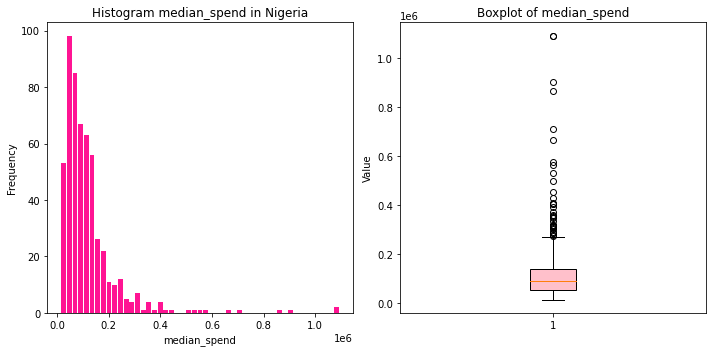

In [44]:
## Exploration of dependient variable using different visualizacions plots like histogram and boxplot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
#histogram
bins=np.linspace(min(df["median_spend"]), max(df["median_spend"])+2)#change the bins for other visualizations
ax1.hist(x="median_spend", bins=bins,data=df, color='deeppink', rwidth=0.85)
ax1.set_title('Histogram median_spend in Nigeria')
ax1.set_xlabel('median_spend')
ax1.set_ylabel('Frequency')

#boxplot
ax2.boxplot(df['median_spend'], patch_artist=True, boxprops=dict(facecolor='pink'))
ax2.set_title('Boxplot of median_spend')
ax2.set_ylabel('Value')
plt.tight_layout()
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>The figures show that 75% of the groups of people spend up to 140,685 NGA annually (presumably this is the unit of measurement for the median spend variable). Upon examining the boxplot and the summary, it is observed that the maximum value in the dataset is 1,092,064 NGA , whereas the maximum value calculated for the boxplot is approximately 300,000 NGA.Values above 0.3 could be considered outliers. Considering that these extreme values also represent a portion of the population I decide to work with the complete data set. Also, the histogram's shape suggests an exponential pattern in the median spend. As a result, I decided to apply a logarithmic transformation to the dependent variable in the subsequently linear regression analysis.</b>
</div>

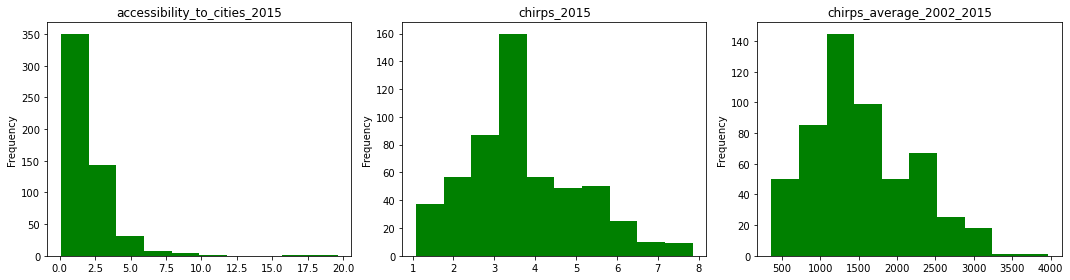

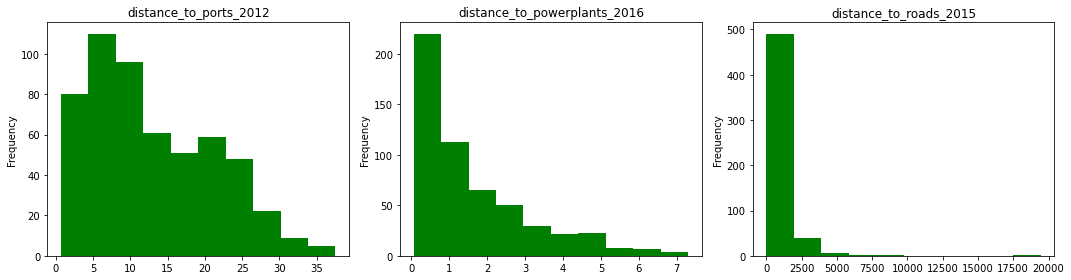

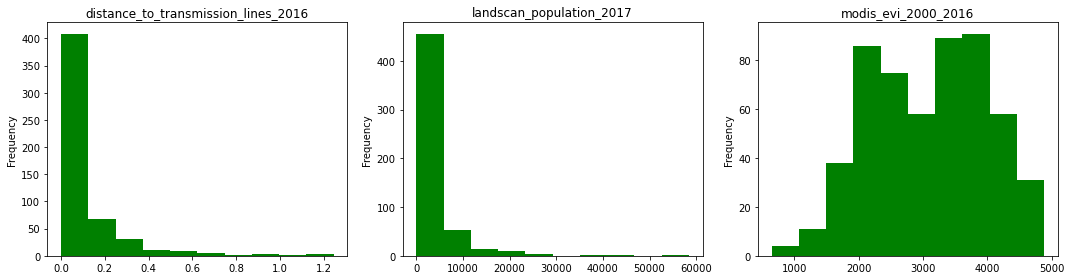

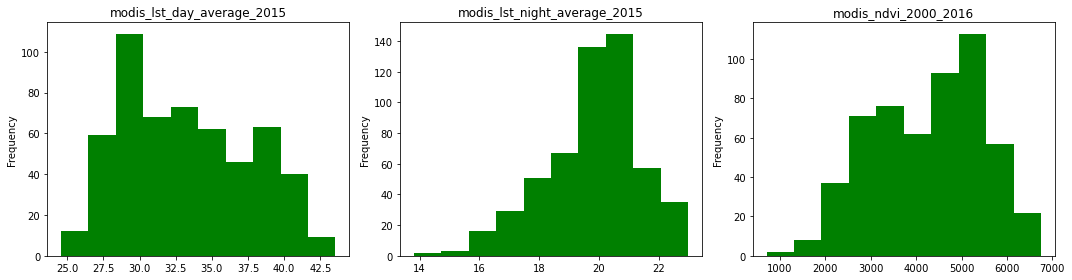

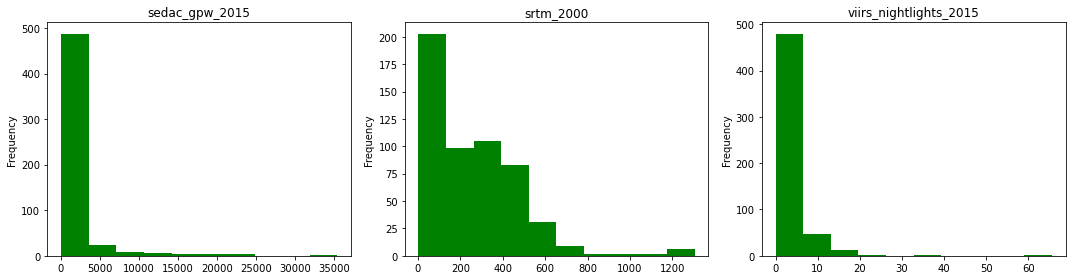

In [120]:
##Histograms of independient variables to explore data distibution

#dropt not interest columns
independient_variables = df.drop(['Unnamed: 0','median_spend', 'lat', 'long'], axis=1).columns.tolist() 

#Iterate over all the columns in the 'independient_variables' list and, to enhance visualization, create three histograms side by side.
for i in range(0, len(independient_variables), 3):
    fig, axes = plt.subplots(1, min(3, len(independient_variables)-i), figsize=(15, 4))
    for j, col_name in enumerate(independient_variables[i:i+3]):
        axes[j].hist(df[col_name], color='green')
        axes[j].set_title(col_name)
        axes[j].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()     
 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>The histograms reveal that several independent variables, including accessibility to cities, distances to power plants, road and transmission lines, sedac (population density), and VIIRS nightlights (measuring visible light at nighttime), exhibit a similar pattern or distribution to the median spend variable. This suggests a potential relationship or association between these variables and the median spend. 
 </b>
</div>

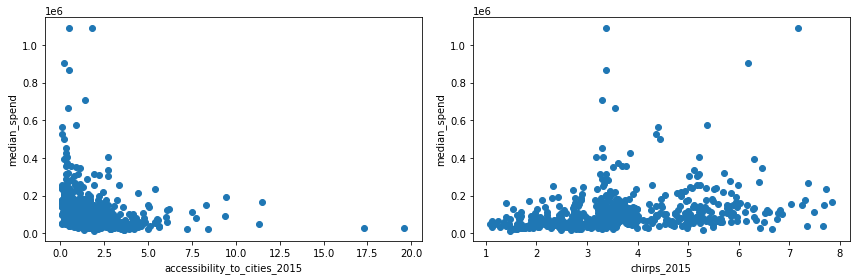

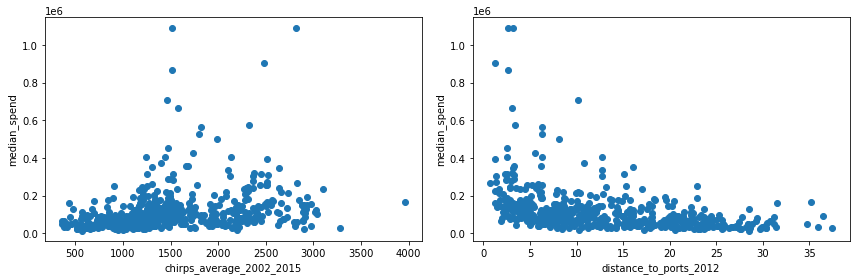

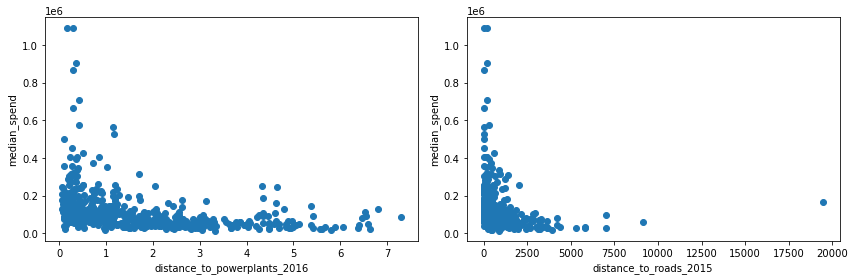

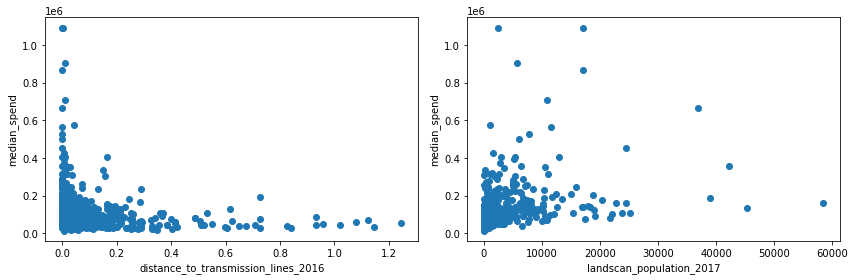

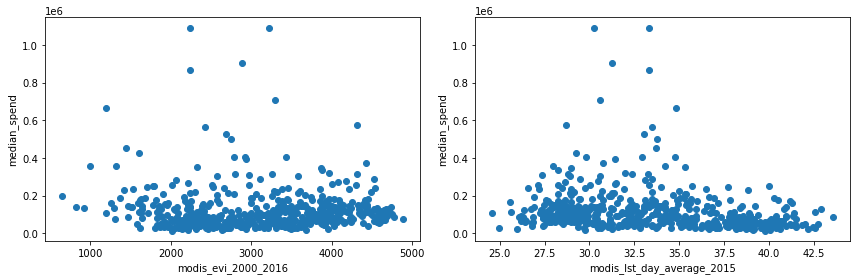

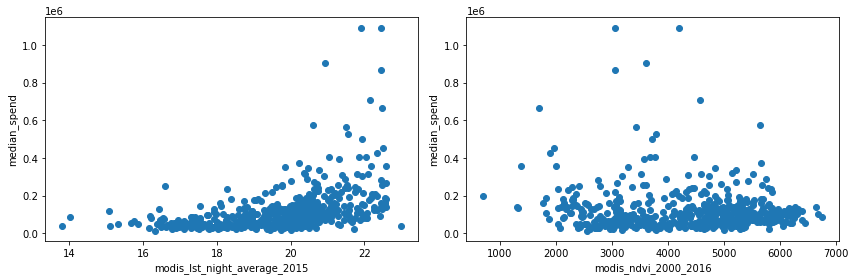

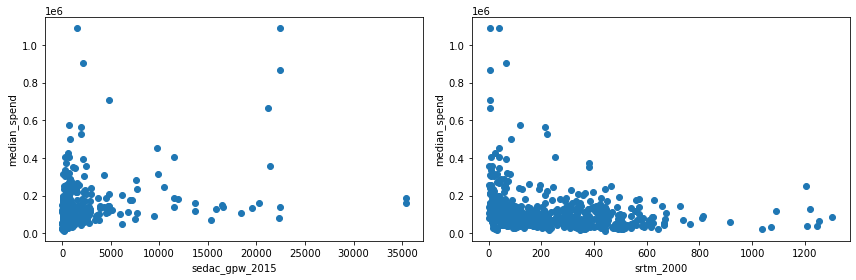

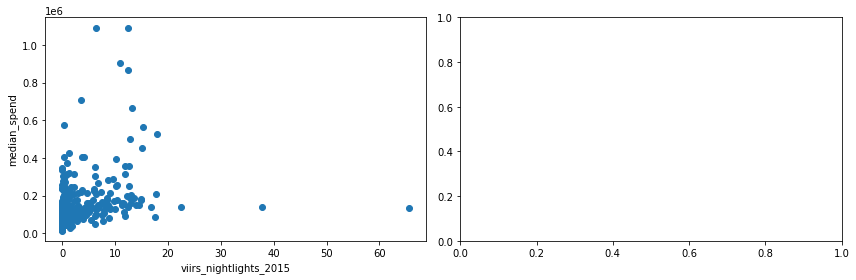

In [251]:
# Scatter plots for visualizing the shape of the relationships between dependient and independient variables

dependient_variable = df["median_spend"].tolist()
independient_variables = df.drop(['Unnamed: 0','median_spend', 'lat', 'long'], axis=1).columns.tolist()

# Iterate over the list of independent variables and create scatterplots side by side.
for i in range(0, len(independient_variables), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))    
    axes[0].scatter(df[independient_variables[i]], dependient_variable)
    axes[0].set_xlabel(independient_variables[i])
    axes[0].set_ylabel("median_spend")    
    if i+1 < len(independient_variables):
        axes[1].scatter(df[independient_variables[i+1]], dependient_variable)
        axes[1].set_xlabel(independient_variables[i+1])
        axes[1].set_ylabel("median_spend")
    
    plt.tight_layout()
    plt.show()  


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b> Scatterplots help visualize the relationships between median spend and the independent variables. Consistent with the histograms, accessibility to cities and distance variables show a negative relationship with median spend. This is also observed with elevation. On the other hand, nighttime temperature shows a positive relationship with median spend. At this point, we can start considering the underlying causes of these relationships. The plots could indicate that groups with higher spending are geographically located in more central areas or cities, such as those closer to the port. 
     </b>
</div>

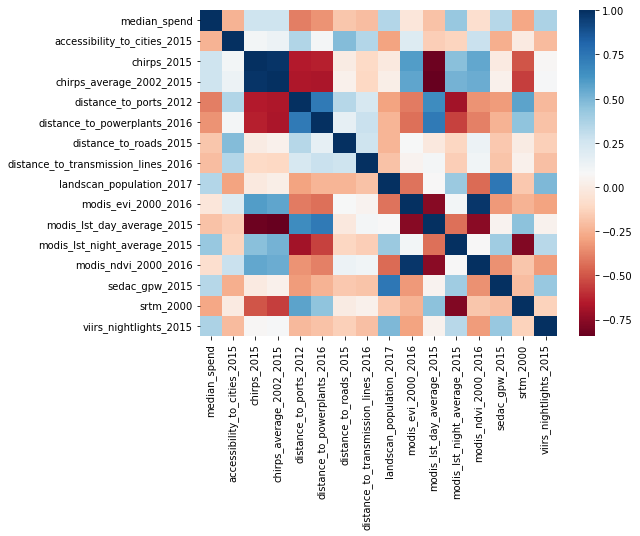

In [258]:
#Correlation analysis to determine multicollinearity between variables
df1=df.drop(['Unnamed: 0','lat', 'long'], axis=1)
correlation_matrix = df1.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='RdBu', ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

# Display correlation matrix as a table. Uncomment to check the values
#correlation_table = correlation_matrix.round(2)
#print(correlation_table)


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b> Correlation analysis is highly useful in streamlining the variable selection process. Including more variables in the models does not necessarily guarantee better results. In this case, the pairs of variables that exhibit high correlation (>0.80) are not among the variables I initially selected for inclusion in the model. Therefore, I will not discard any variables at this stage.
</div>

## 4.EXPLORATORY SPATIAL DATA ANALYSIS <a id="sda"></a>

<style>
    .rendered_html {
        background-color: white;
    }
</style>

Visualization of variables in space gives another perspective in the analysis. 

       
    
</ol>

In [1]:
#import libraries for maps
import folium
from folium.plugins import HeatMap
from branca.colormap import linear
from folium.raster_layers import WmsTileLayer

<div style="background-color: yellow; padding: 10px;">
THE FOLLOWING CODES ARE FOR THE VISUALIZATION OF INTERACTIVE MAPS. HOWEVER, GITHUB DOES NOT ALLOW THE DIRECT DISPLAY OF THESE TYPES OF MAPS. I HAVE CAPTURED SCREENSHOTS OF THE MAPS WHICH I UPLOADED AS A FILE IN THE REPOSITORY. NEVERTHELES I HAVE PROVIDED THE ORIGINAL MAP CODES SO THAT THEY CAN BE USED LOCALLY.
</div>

In [ ]:
##########  MAP 1 ###############################

###Median spend hotspotmmap with Google Earth as the background.

#localization is the central coordinates of Nigeria
m = folium.Map(location=[9.081999, 8.675277], zoom_start=10, tiles='https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}', attr='Google')
# Generate a list of coordinates and 'median_spend' values.
heat_data = [[row['lat'], row['long'], row['median_spend']] for index, row in df.iterrows()]
# Aggregate the colour map
HeatMap(heat_data).add_to(m)
m

![heatmap](headmap_nigeria.jpg)

In [ ]:
##################### MAP 2 AND 3################################3 

#Point map of medium spend on the space

m = folium.Map(location=[9.081999, 8.675277], zoom_start=10)
# Add the Google satellite image layer
wms_url = 'http://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'
folium.TileLayer(
    tiles=wms_url,
    attr='Google',
    name='Google Satellite',
    overlay=True,
).add_to(m)
# Create a color scale
colormap = linear.PuRd_09.scale(df['median_spend'].min(), df['median_spend'].max())
colormap.caption = 'Median Spend'
# Iterate over the points and add them to the map with the color scale
for index, row in df.iterrows():
    lat = row['lat']
    lon = row['long']
    median_spend = row['median_spend']
    color = colormap(median_spend)
    folium.CircleMarker([lat, lon], color=color, fill=True, fill_color=color, fill_opacity=0.7, radius=5).add_to(m)
# Add the color scale to the map
colormap.add_to(m)
m


![pointmap_1](pointmap_1.jpg)

![pointmap2](pointmap_2.jpg)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b> The hotspot map, along with a point map, provided me with valuable information about the median spend across the geographical space. The point map reveals that, overall, the spending is relatively homogeneous. However, upon closer examination, darker spots can be observed in coastal cities. This pattern is further highlighted in the heatmap, where the hotspots representing households with higher spending are primarily located in urban areas.
</div>


In [ ]:
################################### MAP 4 ##############################################

# Point map of nigh temperature on the space

m = folium.Map(location=[9.081999, 8.675277], zoom_start=10)
# Add the Google satellite image layer
wms_url = 'http://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'
folium.TileLayer(
    tiles=wms_url,
    attr='Google',
    name='Google Satellite',
    overlay=True,
).add_to(m)

# Create a color scale
colormap = linear.PuRd_09.scale(df['modis_lst_night_average_2015'].min(), df['modis_lst_night_average_2015'].max())
colormap.caption = 'modis_lst_night_average_2015'

# Iterate over the points and add them to the map with the color scale
for index, row in df.iterrows():
    lat = row['lat']
    lon = row['long']
    median_spend = row['modis_lst_night_average_2015']
    color = colormap(median_spend)
    folium.CircleMarker([lat, lon], color=color, fill=True, fill_color=color, fill_opacity=0.7, radius=5).add_to(m)

# Add the color scale to the map
colormap.add_to(m)
m

![tempmap](tempmap.JPG)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>It is fascinating to observe the nighttime temperature variable in space. In previous analyses, this variable showed a strong correlation with the median spend. The geography of Nigeria has a particular feature where the northern region is arid and close to the Sahara Desert, contrasting with the ecosystems in the southern part of the country. This geographical pattern is reflected in the general trend of lower nighttime temperatures in the north. This is due to the higher thermal amplitude in desert areas compared to cities, which have more heat retention due to their urban structures.However, within the northern region, there are some darker spots on the map, indicating lower nighttime temperatures. This reinforces the potential of this variable to match larger cities and could be valuable in relation to the median spend.  
    </b>
</div>

## 5. MODELING <a id="md"></a>

<style>
    .rendered_html {
        background-color: white;
    }
</style>
The approach I prefer to take in modeling is to start with simple linear regressions. Running a simple linear regression model allows me to establish the fundamental principles of hedonic modeling and interpret the coefficients. This is important because spatial linear regression analyses, if necessary, are built upon non-spatial models. Additionally, both simple and multiple linear regression models serve as a basis for comparison with spatial models.     
</ol>


In [113]:
#import libraries for stadistical analysis
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.graphics.gofplots as smg

In [225]:
# Simple lineal regresion models
results = []
independient_variables = df.drop(['Unnamed: 0','median_spend', 'lat', 'long'], axis=1).columns.tolist()
dependient_variablen=np.log(df['median_spend']) # Applying logarithm to the dependent variable based on exploratory analysis

#Iterate linear regression of the dependent variable with each of the independent variables.
for independient in independient_variables:
    X = df[[independient]]
    y = dependient_variable    
    model = LinearRegression()
    model.fit(X, y)    
    coefficient_of_interception = model.intercept_
    coeficient_variable = model.coef_[0]
    r2 = model.score(X, y)    
    results.append({'Independient_variable': independient,
                       'Coefficient of Interception':   coefficient_of_interception,
                       'Independient_variable_coefficient': coeficient_variable,
                       'R^2': r2})  
df_resultados = pd.DataFrame(resultados)
display(df_resultados)


,Independient_variable,Coefficient of Interception,Independient_variable_coefficient,R^2
0,accessibility_to_cities_2015,11.662967,-0.132683,0.126082
1,chirps_2015,10.729633,0.185518,0.129290
2,chirps_average_2002_2015,10.779458,0.000414,0.141334
3,distance_to_ports_2012,12.021964,-0.046981,0.290920
4,distance_to_powerplants_2016,11.787221,-0.233392,0.250103
5,distance_to_roads_2015,11.521279,-0.000142,0.066835
6,distance_to_transmission_lines_2016,11.531055,-1.131936,0.082497
7,landscan_population_2017,11.273358,0.000047,0.154546
8,modis_evi_2000_2016,11.231555,0.000059,0.005489
9,modis_lst_day_average_2015,13.176149,-0.053022,0.106504


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>The simple regression analysis shows that none of the independent variables have a strong statistical relationship with the median spend. However, the variables of nighttime temperature, distance to power plants, and distance to ports were the top-ranked variables, explaining over 25% of the variability in the median spend of Nigerian households.
    </b>
</div>

In [261]:
#Independient variable selection with stepforward method.

X = df.drop(['Unnamed: 0','median_spend', 'lat', 'long'], axis=1)
X = sm.add_constant(X)
y = df['median_spend']

# Create a list to store the selected variables.
selected_variables = []
# Inicialite best criterior selection
best_criterion = float('inf')

# Define selection criterion (ex.AIC o BIC)
criterion = 'aic'

# Iterate until there are no significant variables or all variables have been included.
while len(selected_variables) < X.shape[1]:
    p_values = []
    models = []
    criteria = []
    
    # Iterate over the non-selected variables and calculate the selection criterion for each one.
    for variable in X.columns:
        if variable not in selected_variables:
            variables = selected_variables + [variable]
            model = sm.OLS(y, X[variables])
            results = model.fit()
            p_values.append((variable, results.pvalues[variable]))
            models.append(results)
            criteria.append(getattr(results, criterion))
    
    #Get the index of the best selection criterion.
    best_index = criteria.index(min(criteria))
    best_variable, best_p_value = p_values[best_index]
    
    #If the best p-value is significant, add the variable to the selected variables set.
    if best_p_value < 0.05:
        selected_variables.append(best_variable)
        best_model = models[best_index]
        best_criterion = criteria[best_index]
    else:
        break
    
# print results
df_resultados = pd.DataFrame({'Variable': selected_variables,
                              'Coeficiente': best_model.params[selected_variables]})
#print(df_resultados)
#print(best_model.summary())
display(df_resultados)
display(best_model.summary())

,Variable,Coeficiente
modis_lst_night_average_2015,modis_lst_night_average_2015,7612.347956
distance_to_ports_2012,distance_to_ports_2012,-3205.741940
viirs_nightlights_2015,viirs_nightlights_2015,5342.666207
sedac_gpw_2015,sedac_gpw_2015,3.514929
distance_to_transmission_lines_2016,distance_to_transmission_lines_2016,-51652.019116


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           median_spend   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                              193.0
Date:                Sun, 04 Jun 2023   Prob (F-statistic):                   2.38e-117
Time:                        21:26:04   Log-Likelihood:                         -6997.7
No. Observations:                 541   AIC:                                  1.401e+04
Df Residuals:                     536   BIC:                                  1.403e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
modis_lst_night_average_2015         7612.3480    444.904     17.110      0.000    6738.379    8486.317
distance_to_ports_2012              -3205.7419    526.935     -6.084      0.000   -4240.853   -2170.631
viirs_nightlights_2015               5342.6662    998.922      5.348      0.000    3380.383    7304.949
sedac_gpw_2015                          3.5149      1.247      2.820      0.005       1.066       5.964
distance_to_transmission_lines_2016 -5.165e+04   2.51e+04     -2.059      0.040   -1.01e+05   -2378.499
==============================================================================
Omnibus:                      485.896   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16089.517
Skew:                           3.850   Prob(JB):                         0.00
Kurtosis:                      28.583   Cond. No.                     2.50e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>Variables to test in the models, based on previosly analysis are: modis_lst_night_average,distance_to_ports,viirs_nightlights_2015,sedac_gpw_2015,distance variables and accessibility_to_cities_2015
    </b>
</div>


In [270]:
#Create a function for multiple linear regression analysis to compare models.

def multiple_linear_regression(dependent_variable, independent_variables):
    X = sm.add_constant(independent_variables)
    # Fit multiple linear regression
    model = sm.OLS(dependent_variable, X)
    results = model.fit()
    print(results.summary())
    
    # Get residuals
    residuals = results.resid
    
    # Create subplots for residuals and QQ plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot residuals
    ax1.scatter(dependent_variable, residuals)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_xlabel('Dependent Variable')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals Plot')
    
    # QQ plot of residuals
    smg.qqplot(residuals, line='s', ax=ax2)
    ax2.set_xlabel('Theoretical Quantiles')
    ax2.set_ylabel('Sample Quantiles')
    ax2.set_title('QQ Plot of Residuals')
    
    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:           median_spend   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     32.61
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           2.42e-65
Time:                        21:48:37   Log-Likelihood:                -405.21
No. Observations:                 541   AIC:                             842.4
Df Residuals:                     525   BIC:                             911.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

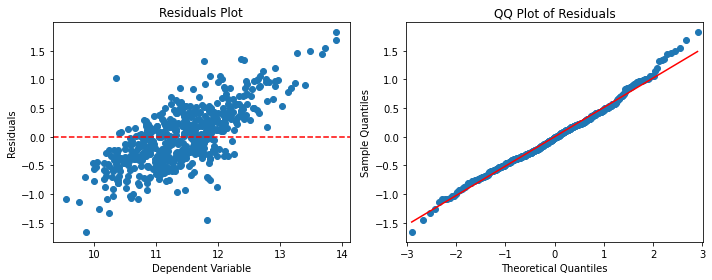

In [268]:
#test all the independient variables
independient_variables = df.drop(['Unnamed: 0','median_spend', 'lat', 'long'], axis=1)
dependient_variable = np.log(df['median_spend'])
multiple_linear_regression(dependient_variable, independient_variables)

In [152]:
df.columns

Index(['Unnamed: 0', 'median_spend', 'lat', 'long',
       'accessibility_to_cities_2015', 'chirps_2015',
       'chirps_average_2002_2015', 'distance_to_ports_2012',
       'distance_to_powerplants_2016', 'distance_to_roads_2015',
       'distance_to_transmission_lines_2016', 'landscan_population_2017',
       'modis_evi_2000_2016', 'modis_lst_day_average_2015',
       'modis_lst_night_average_2015', 'modis_ndvi_2000_2016',
       'sedac_gpw_2015', 'srtm_2000', 'viirs_nightlights_2015'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:           median_spend   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     74.74
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.54e-67
Time:                        22:12:51   Log-Likelihood:                -418.40
No. Observations:                 541   AIC:                             850.8
Df Residuals:                     534   BIC:                             880.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

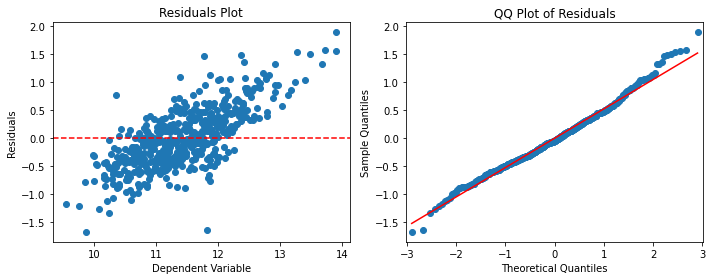

In [271]:
independient_variables = df[['modis_lst_night_average_2015','accessibility_to_cities_2015', 'distance_to_powerplants_2016','sedac_gpw_2015','viirs_nightlights_2015','distance_to_transmission_lines_2016']]
dependient_variable = np.log(df['median_spend'])
multiple_linear_regression(dependient_variable, independient_variables)


                            OLS Regression Results                            
Dep. Variable:           median_spend   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           3.42e-69
Time:                        22:13:10   Log-Likelihood:                -419.34
No. Observations:                 541   AIC:                             848.7
Df Residuals:                     536   BIC:                             870.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

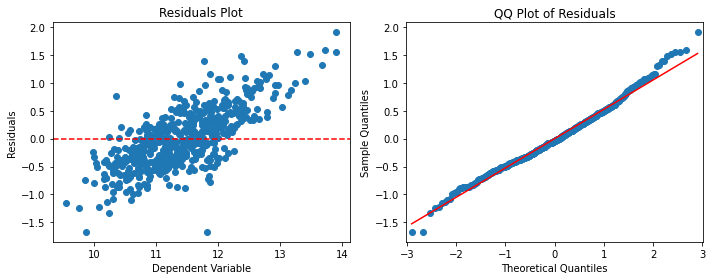

In [272]:
independient_variables = df[['modis_lst_night_average_2015','accessibility_to_cities_2015', 'distance_to_powerplants_2016','viirs_nightlights_2015']]
dependient_variable = np.log(df['median_spend'])
multiple_linear_regression(dependient_variable, independient_variables)

In [283]:
#Result of models

data = {'Model': ['all var', '6 var', '4 var'],
        'AIC': [842, 850, 848],
        'BIC': [911, 880, 870],
        'R^2': [0.48, 0.45, 0.45]}
df = pd.DataFrame(data)
display(df)


,Model,AIC,BIC,R^2
0,all var,842,911,0.48
1,6 var,850,880,0.45
2,4 var,848,870,0.45


In [208]:
import geopandas as gpd
import libpysal
from esda.moran import Moran
import geopandas as gpd
import libpysal as lp
from mgwr.gwr import GWR

In [278]:
#There appears to be evidence of clustering based on the exploratory maps. Moran's Index measure of spatial autocorrelation

import geopandas as gpd
import libpysal
from esda.moran import Moran

# Create the GeoDataFrame based on lat y lon
geometry = gpd.points_from_xy(df['long'], df['lat'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

#Build the spatial weights matrix.
w = libpysal.weights.DistanceBand.from_dataframe(gdf, threshold=100, binary=False)

# Calculate Moran´s Index
moran = Moran(gdf['median_spend'], w)

print("Moran's I:", moran.I)
print("Moran's p-value:", moran.p_sim)



C:\Users\Belen\anaconda3\envs\geo\lib\site-packages\scipy\sparse\_data.py:117: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)


Moran's I: 0.19563866719357742
Moran's p-value: 0.001


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>The value of Moran's I was 0.1956, indicating a moderate positive spatial correlation. The p-value of 0.001 indicates that this correlation is not due to random chance, but is statistically significant. Based on these results, it could be   recommended to conduct a spatial regression analysis (GWR, SpatialLag) which can help to explore and quantify the spatial relationships between the variables.
    </b>
</div>

## 6. CONCLUSION <a id="co"></a>

All tested models showed similar results in terms of model selection criteria such as AIC and BIC. The same pattern was observed with R2. In all cases, QQ plots of the residuals were examined, showing a relatively normal distribution, although some deviations from the diagonal line were observed at the extremes. The residual plot indicated potential issues with trend, which led to testing higher-order terms (quadratic or cubic) and the addition of explanatory variables (see supplementary analysis). However, the results remained consistent. This suggests that there may be independent variables influencing the median spending in Nigeria that were not included in the models. This is logical considering that we are dealing with real-world problems, and it is highly probable that there are unmeasured variables influencing median spending.

The three best-performing models had similar performance; however, I would select the 4-variable model, which has the lowest BIC, as I prioritize achieving the best performance with the least complexity. My choice of model for the modeling of median spending in Nigeria is based on a personal perspective, which should be reinforced with a deeper analysis of the social context. In this particular case, I believe that obtaining or measuring a large number of variables that explain a certain phenomenon may require high costs in terms of human and financial resources.